In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np      
from ipywidgets import Output, FloatSlider, Layout
from IPython.display import clear_output

def sine_func(x, w, amp):
  return amp*np.sin(w*x)

In [14]:
import ipywidgets
ipywidgets.__version__

'8.0.4'

interactive(children=(FloatSlider(value=1.0, description='w', max=4.0, step=0.25), FloatSlider(value=1.0, desc…

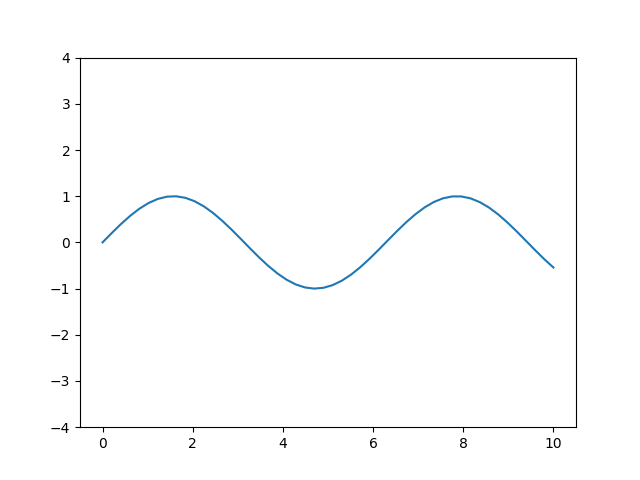

In [23]:
fig_one, ax_one = plt.subplots(1,1)

x = np.linspace(0,10)

w_rand = FloatSlider(min=0.1, max=5.0, step=0.05, value=0.8, description="RANDOM")

@widgets.interact(w=(0, 4, 0.25), amp=(0, 4, .1))
def update(w = 1, amp = 1):
    plt.figure(fig_one.number)
    plt.clf()
    plt.ylim(-4, 4)
    plt.plot(x, sine_func(x, w, amp))
    display(w_rand)


Move the sliders to change the waveform
Click on the waverform to increase the linewidth.


FloatSlider(value=0.8, description='W', max=5.0, min=0.1, step=0.05)

FloatSlider(value=1.0, description='Amplitude', max=3.0, min=0.1)

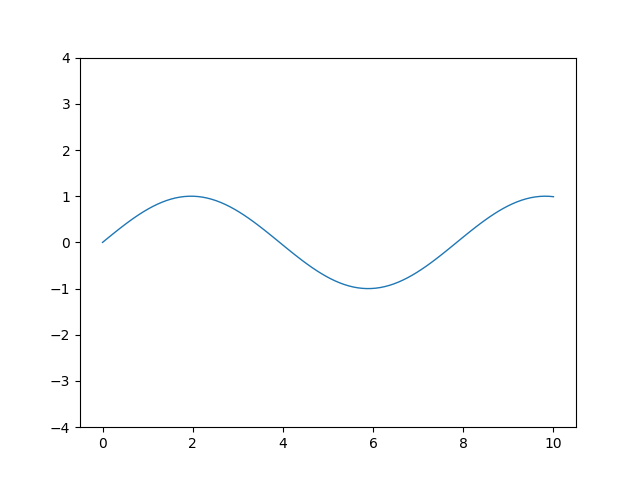

In [22]:

w_output = Output(layout=Layout(border="1px solid blue"))

x = np.linspace(0,10, 100)
w = 1.3
amp = 1.0

w_w = FloatSlider(min=0.1, max=5.0, step=0.05, value=0.8, description="W")
w_a = FloatSlider(min=0.1, max=3.0, step=0.1, value=1.0, description="Amplitude")

props = dict(
    linewidth=1
)

#plt.ioff()
fig_two, ax_two = plt.subplots(1,1)
#plt.ion()

with w_output:
    display(fig_two.canvas)
    
def on_pick(evt):
    print(evt)
    props["linewidth"] = props["linewidth"] + 1
    redraw_plot({})
    
cid = fig_two.canvas.mpl_connect('pick_event', on_pick)
    


def redraw_plot(evt):
    with w_output:
        ax_two.cla()
        ax_two.set_ylim(-4, 4)
        ax_two.plot(x, sine_func(x, w_w.value, w_a.value), **props, picker=True)
        clear_output()

redraw_plot({})

w_w.observe(redraw_plot, names=["value"])
w_a.observe(redraw_plot, names=["value"])

print("")
print("Move the sliders to change the waveform")
print("Click on the waverform to increase the linewidth.")
display(w_w)
display(w_a)